In [1]:
# Imports
import os
import requests
import pandas as pd
#import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
from pathlib import Path
from dotenv import load_dotenv
import yfinance as yf

%matplotlib inline

C:\Users\jorda\anaconda3\envs\pyvizenv\lib\site-packages\xarray\core\merge.py:10: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)



Bad key "text.kerning_factor" on line 4 in
C:\Users\jorda\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Stock Protfolio Info & Table
stocks = ['2357.TW', 'AAPL', 'AC.TO', 'CCL', 'CM-PQ.TO', 'F', 'MSFT', 'NVDA', 'PFE', 'TSLA']

stockportfolio = {
    'Asset' : stocks,
    'Amount' : [100, 1000, 1000, 1000, 1000, 100, 100, 1000, 100, 100],
    'Cost' : [367, 25.91, 28.13, 23.76, 15.19, 265.02, 761.24, 38.98, 349.46, 671.87]
}

#Creating a dataframe using the dictionary
stockportfoliotable = pd.DataFrame.from_dict(stockportfolio, orient='index')
stockportfoliotable = stockportfoliotable.transpose()
stockportfoliotable = stockportfoliotable.set_index('Asset')
stockportfoliotable['Cost Basis'] = stockportfoliotable.Amount * stockportfoliotable.Cost
stocktotalcostbasis = stockportfoliotable['Cost Basis'].sum()
stockportfoliotable['Position %'] = stockportfoliotable['Cost Basis'] / stocktotalcostbasis

#Create Stock Weight List for MC Simulation
stockweight = stockportfoliotable['Position %'].to_list()

stockportfoliotable

Amount    Cost Cost Basis Position %
Asset                                        
2357.TW     100     367      36700  0.0982784
AAPL       1000   25.91      25910   0.069384
AC.TO      1000   28.13      28130  0.0753289
CCL        1000   23.76      23760  0.0636266
CM-PQ.TO   1000   15.19      15190  0.0406771
F           100  265.02      26502  0.0709693
MSFT        100  761.24      76124   0.203851
NVDA       1000   38.98      38980   0.104384
PFE         100  349.46      34946  0.0935814
TSLA        100  671.87      67187   0.179919

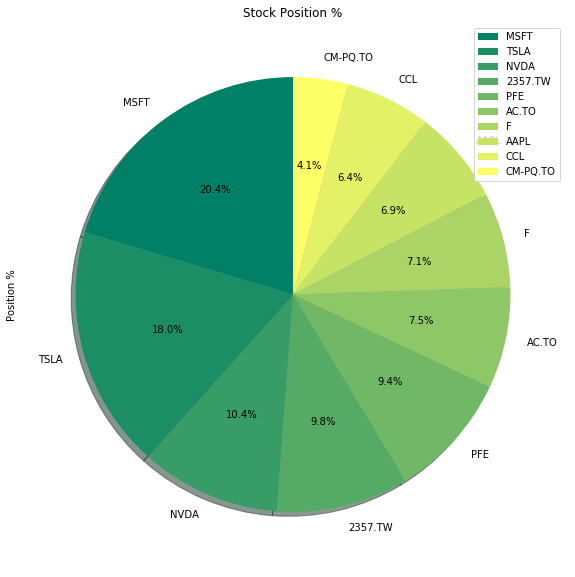

In [4]:
# Create a Pie Chart of the Portfolio Data
stockportsorted = stockportfoliotable.sort_values(['Position %'], ascending=False)

stockportsorted.plot(kind='pie', y='Position %', shadow = True, startangle=90,
                                figsize=(15,10), autopct='%1.1f%%', title='Stock Position %', colormap='summer')

In [5]:
#Getting Sector info for Pie Chart
#sectors = []
#for i in stocks:
    #tickers = yf.Tickers(i)
    #sectors.append((tickers.tickers[i]).info[sector])
#sectors

In [6]:
# Stock Protfolio Info & Table
crypto = ['ADA-USD', 'BTC-USD', 'ETH-USD', 'LINK-USD', 'LTC-USD']

cryptoportfolio = {
    'Asset' : crypto,
    'Amount' : [10000, 1, 10, 1000, 100],
    'Cost' : [1.2902, 32870.84, 1865.51, 17.25, 128.45]
}

#Creating a dataframe using the dictionary
cryptoportfoliotable = pd.DataFrame.from_dict(cryptoportfolio, orient='index')
cryptoportfoliotable = cryptoportfoliotable.transpose()
cryptoportfoliotable = cryptoportfoliotable.set_index('Asset')
cryptoportfoliotable['Cost Basis'] = cryptoportfoliotable.Amount * cryptoportfoliotable.Cost
cryptototalcostbasis = cryptoportfoliotable['Cost Basis'].sum()
cryptoportfoliotable['Position %'] = cryptoportfoliotable['Cost Basis'] / cryptototalcostbasis

cryptoweight = cryptoportfoliotable['Position %'].to_list()
cryptoportfoliotable

Amount     Cost Cost Basis Position %
Asset                                         
ADA-USD   10000   1.2902      12902   0.136496
BTC-USD       1  32870.8    32870.8   0.347755
ETH-USD      10  1865.51    18655.1   0.197361
LINK-USD   1000    17.25      17250   0.182495
LTC-USD     100   128.45      12845   0.135893

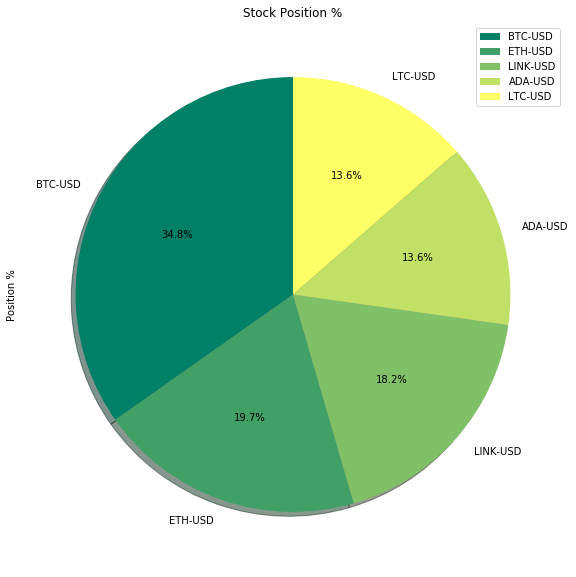

In [7]:
# Create a Pie Chart of the Portfolio Data
cryptoportsorted = cryptoportfoliotable.sort_values(['Position %'], ascending=False)

cryptoportsorted.plot(kind='pie', y='Position %', shadow = True, startangle=90,
                                figsize=(15,10), autopct='%1.1f%%', title='Stock Position %', colormap='summer')

In [8]:
#Total Portfolio Data
totalportfoliotable = pd.concat([stockportfoliotable, cryptoportfoliotable])
del totalportfoliotable['Position %']
totalcostbasis = stocktotalcostbasis + cryptototalcostbasis
totalportfoliotable['Position %'] = totalportfoliotable['Cost Basis'] / totalcostbasis
totalportfoliotable

Amount     Cost Cost Basis Position %
Asset                                         
2357.TW     100      367      36700  0.0784269
AAPL       1000    25.91      25910  0.0553689
AC.TO      1000    28.13      28130   0.060113
CCL        1000    23.76      23760  0.0507744
CM-PQ.TO   1000    15.19      15190  0.0324606
F           100   265.02      26502   0.056634
MSFT        100   761.24      76124   0.162675
NVDA       1000    38.98      38980  0.0832992
PFE         100   349.46      34946  0.0746786
TSLA        100   671.87      67187   0.143577
ADA-USD   10000   1.2902      12902  0.0275712
BTC-USD       1  32870.8    32870.8  0.0702441
ETH-USD      10  1865.51    18655.1  0.0398654
LINK-USD   1000    17.25      17250  0.0368628
LTC-USD     100   128.45      12845  0.0274494

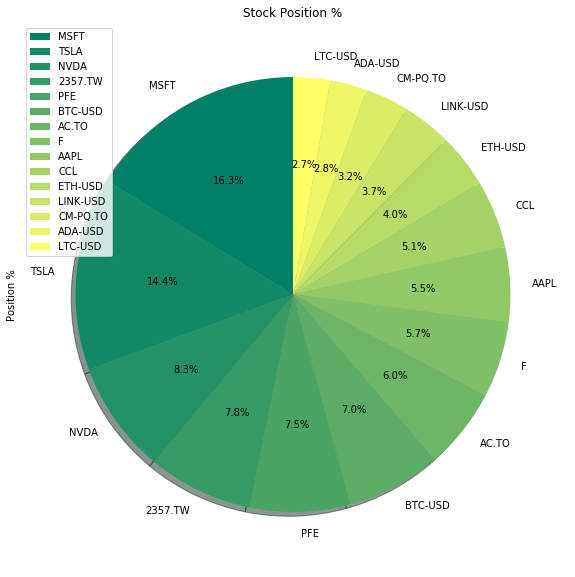

In [9]:
# Create a Pie Chart of the Portfolio Data
totalportsorted = totalportfoliotable.sort_values(['Position %'], ascending=False)

totalportsorted.plot(kind='pie', y='Position %', shadow = True, startangle=90,
                                figsize=(15,10), autopct='%1.1f%%', title='Stock Position %', colormap='summer')

In [10]:
# Stock Data
stock_close = yf.download(stocks, group_by='Ticker', period='10y')

# Create CSV of ticker data
stock_close.to_csv('stocks.csv')

stock_close = stock_close.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

stock_close = pd.read_csv('stocks.csv', header=[0, 1])
stock_close.drop([0], axis=0, inplace=True)  # drop this row because it only has one column with Date in it
stock_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')] = pd.to_datetime(stock_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')], format='%Y-%m-%d')  # convert the first column to a datetime
stock_close.set_index(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'), inplace=True)  # set the first column as the index
stock_close.index.name = None

# Drop Null Information
stock_close = stock_close.dropna()

# Sort Multi-Index To Match Weights
stock_close = stock_close.reindex(sorted(stock_close.columns), axis=1)

stock_close

[*********************100%***********************]  10 of 10 completed


2357.TW                                               AAPL  \
             Adj Close  Close   High    Low   Open     Volume   Adj Close   
2015-03-11  223.824799  322.0  326.5  322.0  323.0  2017000.0   27.859491   
2015-03-12  225.215042  324.0  325.5  321.5  322.0  1818000.0   28.363159   
2015-03-13  224.172363  322.5  325.0  322.0  323.0  2127000.0   28.167162   
2015-03-16  221.044373  318.0  323.0  316.0  320.0  4840000.0   28.477116   
2015-03-17  220.696838  317.5  322.5  315.0  320.5  3586000.0   28.953447   
...                ...    ...    ...    ...    ...        ...         ...   
2021-06-25  367.000000  367.0  375.0  367.0  375.0  6370441.0  133.110001   
2021-06-28  372.500000  372.5  374.0  365.0  368.5  3777733.0  134.779999   
2021-06-29  370.000000  370.0  374.0  370.0  373.0  2028525.0  136.330002   
2021-06-30  371.500000  371.5  375.0  370.0  371.5  2792667.0  136.960007   
2021-07-02  371.000000  371.0  372.0  367.0  368.5  1789983.0  139.960007   

                                                ...        PFE             \
                 Close        High         Low  ...       High        Low   
2015-03-11   30.559999   31.192499   30.527500  ...  32.352940  31.907021   
2015-03-12   31.112499   31.225000   30.407499  ...  32.314991  32.049335   
2015-03-13   30.897499   31.350000   30.645000  ...  32.258064  31.973434   
2015-03-16   31.237499   31.237499   30.717501  ...  32.789375  32.220116   
2015-03-17   31.760000   31.830000   31.412500  ...  32.542694  32.201138   
...                ...         ...         ...  ...        ...        ...   
2021-06-25  133.110001  133.889999  132.809998  ...  39.410000  38.889999   
2021-06-28  134.779999  135.250000  133.350006  ...  39.209999  38.900002   
2021-06-29  136.330002  136.490005  134.350006  ...  39.279999  38.980000   
2021-06-30  136.960007  137.410004  135.869995  ...  39.270000  38.820000   
2021-07-02  139.960007  140.000000  137.750000  ...  39.830002  39.380001   

                                         TSLA                          \
                 Open      Volume   Adj Close       Close        High   
2015-03-11  32.239090  26996840.0   38.748001   38.748001   39.236000   
2015-03-12  32.077801  29699085.0   38.214001   38.214001   38.889999   
2015-03-13  32.182163  29596847.0   37.736000   37.736000   38.349998   
2015-03-16  32.333965  30615643.0   39.139999   39.139999   39.181999   
2015-03-17  32.371918  21746760.0   38.945999   38.945999   39.742001   
...               ...         ...         ...         ...         ...   
2021-06-25  39.119999  22774300.0  671.869995  671.869995  693.809998   
2021-06-28  39.009998  19225700.0  688.719971  688.719971  694.700012   
2021-06-29  39.130001  14516600.0  680.760010  680.760010  687.510010   
2021-06-30  39.139999  21248100.0  679.700012  679.700012  692.809998   
2021-07-02  39.459999  16592700.0  678.900024  678.900024  700.000000   

                                                
                   Low        Open      Volume  
2015-03-11   38.202000   38.230000  24874500.0  
2015-03-12   37.950001   38.750000  20746500.0  
2015-03-13   37.464001   37.790001  27171500.0  
2015-03-16   37.959999   38.400002  28144000.0  
2015-03-17   38.787998   39.085999  24470500.0  
...                ...         ...         ...  
2021-06-25  668.700012  689.580017  32496700.0  
2021-06-28  670.320007  671.640015  21628200.0  
2021-06-29  675.890015  684.650024  17381300.0  
2021-06-30  678.140015  679.770020  18924900.0  
2021-07-02  673.260010  678.979980  27054500.0  

[1465 rows x 60 columns]

In [11]:
# Configuring a Monte Carlo simulation to forecast 1 year cumulative returns
MC_stock_one_year = MCSimulation(
    portfolio_data = stock_close,
    weights = stockweight,
    num_simulation = 500,
    num_trading_days = 252 * 1
)

In [12]:
# Printing the simulation input data
MC_stock_one_year.portfolio_data.head()

2357.TW                                                      \
             Adj Close  Close   High    Low   Open     Volume daily_return   
2015-03-11  223.824799  322.0  326.5  322.0  323.0  2017000.0          NaN   
2015-03-12  225.215042  324.0  325.5  321.5  322.0  1818000.0     0.006211   
2015-03-13  224.172363  322.5  325.0  322.0  323.0  2127000.0    -0.004630   
2015-03-16  221.044373  318.0  323.0  316.0  320.0  4840000.0    -0.013953   
2015-03-17  220.696838  317.5  322.5  315.0  320.5  3586000.0    -0.001572   

                 AAPL                        ...        PFE              \
            Adj Close      Close       High  ...       Open      Volume   
2015-03-11  27.859491  30.559999  31.192499  ...  32.239090  26996840.0   
2015-03-12  28.363159  31.112499  31.225000  ...  32.077801  29699085.0   
2015-03-13  28.167162  30.897499  31.350000  ...  32.182163  29596847.0   
2015-03-16  28.477116  31.237499  31.237499  ...  32.333965  30615643.0   
2015-03-17  28.953447  31.760000  31.830000  ...  32.371918  21746760.0   

                              TSLA                                   \
           daily_return  Adj Close      Close       High        Low   
2015-03-11          NaN  38.748001  38.748001  39.236000  38.202000   
2015-03-12     0.011002  38.214001  38.214001  38.889999  37.950001   
2015-03-13     0.000000  37.736000  37.736000  38.349998  37.464001   
2015-03-16     0.012941  39.139999  39.139999  39.181999  37.959999   
2015-03-17    -0.007840  38.945999  38.945999  39.742001  38.787998   

                                                
                 Open      Volume daily_return  
2015-03-11  38.230000  24874500.0          NaN  
2015-03-12  38.750000  20746500.0    -0.013781  
2015-03-13  37.790001  27171500.0    -0.012509  
2015-03-16  38.400002  28144000.0     0.037206  
2015-03-17  39.085999  24470500.0    -0.004957  

[5 rows x 70 columns]

In [13]:
# Running a Monte Carlo simulation to forecast 1 year cumulative returns
MC_stock_one_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    0.996125  0.984858  1.006281  1.009342  0.998106  0.999145  0.998339   
2    1.011741  0.977786  1.016943  1.012666  0.999860  0.987740  0.999206   
3    1.006010  0.969173  1.011917  1.019111  0.990524  0.974564  1.018838   
4    1.017874  0.962213  1.026677  1.007007  0.988948  0.983544  1.022018   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.438527  1.382997  1.248386  1.179263  1.694901  1.636882  1.096823   
249  1.441365  1.390048  1.241973  1.162398  1.687527  1.629348  1.115170   
250  1.448592  1.387015  1.246481  1.151348  1.669821  1.632812  1.114953   
251  1.453662  1.372952  1.238258  1.155693  1.669107  1.651008  1.102929   
252  1.469788  1.377738  1.236299  1.157216  1.688339  1.660412  1.103235   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.989084  1.000334  0.991128  ...  1.023138  0.997611  1.013394   
2    0.986358  1.006794  0.968642  ...  1.018672  1.002969  1.001421   
3    0.991721  1.002817  0.964556  ...  1.014279  0.991163  1.011128   
4    1.005711  1.016773  0.972214  ...  1.016313  0.981042  1.018170   
..        ...       ...       ...  ...       ...       ...       ...   
248  0.940267  1.275787  1.342669  ...  1.406422  1.477107  1.595007   
249  0.943036  1.274479  1.341937  ...  1.423156  1.493065  1.613081   
250  0.941072  1.276140  1.333366  ...  1.429402  1.524498  1.604272   
251  0.942158  1.286089  1.343697  ...  1.412701  1.510625  1.595988   
252  0.942047  1.272381  1.351124  ...  1.414351  1.488445  1.603187   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.004953  1.005520  1.000807  1.018464  1.002205  0.994866  0.984751  
2    1.009886  1.000670  1.005479  1.017578  1.006591  0.992459  0.976653  
3    1.021722  0.983811  1.006827  1.009971  1.005243  0.994737  0.984198  
4    1.024509  0.982640  0.998627  1.002282  0.992018  0.997546  0.980597  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.603586  1.405351  1.175606  1.037698  1.239322  1.192250  1.190923  
249  1.600660  1.414962  1.175462  1.031033  1.231106  1.185566  1.190103  
250  1.612466  1.421141  1.178445  1.028088  1.251191  1.199000  1.180678  
251  1.602103  1.412656  1.148097  1.010867  1.225806  1.174809  1.177465  
252  1.581760  1.429850  1.138847  1.002482  1.233538  1.178802  1.208178  

[253 rows x 500 columns]

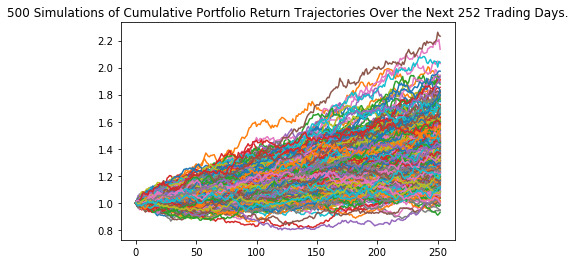

In [14]:
# Plot simulation outcomes
stock_oneyr_line_plot = MC_stock_one_year.plot_simulation()

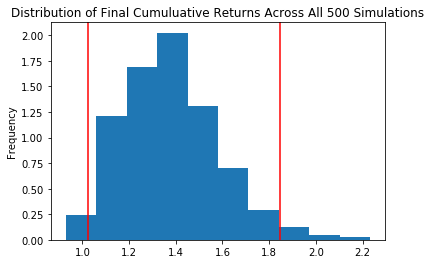

In [15]:
# Plot probability distribution and confidence intervals
stock_oneyr_dist_plot = MC_stock_one_year.plot_distribution()

In [16]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_oneyr_tbl = MC_stock_one_year.summarize_cumulative_return()

# Print summary statistics
print(stock_oneyr_tbl)

count           500.000000
mean              1.380349
std               0.207581
min               0.928899
25%               1.227507
50%               1.364074
75%               1.497336
max               2.232576
95% CI Lower      1.022787
95% CI Upper      1.844784
Name: 252, dtype: float64


In [17]:
# Configuring a Monte Carlo simulation to forecast 5 year cumulative returns
MC_stock_five_year = MCSimulation(
    portfolio_data = stock_close,
    weights = stockweight,
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [18]:
# Printing the simulation input data
MC_stock_five_year.portfolio_data.head()

2357.TW                                                      \
             Adj Close  Close   High    Low   Open     Volume daily_return   
2015-03-11  223.824799  322.0  326.5  322.0  323.0  2017000.0          NaN   
2015-03-12  225.215042  324.0  325.5  321.5  322.0  1818000.0     0.006211   
2015-03-13  224.172363  322.5  325.0  322.0  323.0  2127000.0    -0.004630   
2015-03-16  221.044373  318.0  323.0  316.0  320.0  4840000.0    -0.013953   
2015-03-17  220.696838  317.5  322.5  315.0  320.5  3586000.0    -0.001572   

                 AAPL                        ...        PFE              \
            Adj Close      Close       High  ...       Open      Volume   
2015-03-11  27.859491  30.559999  31.192499  ...  32.239090  26996840.0   
2015-03-12  28.363159  31.112499  31.225000  ...  32.077801  29699085.0   
2015-03-13  28.167162  30.897499  31.350000  ...  32.182163  29596847.0   
2015-03-16  28.477116  31.237499  31.237499  ...  32.333965  30615643.0   
2015-03-17  28.953447  31.760000  31.830000  ...  32.371918  21746760.0   

                              TSLA                                   \
           daily_return  Adj Close      Close       High        Low   
2015-03-11          NaN  38.748001  38.748001  39.236000  38.202000   
2015-03-12     0.011002  38.214001  38.214001  38.889999  37.950001   
2015-03-13     0.000000  37.736000  37.736000  38.349998  37.464001   
2015-03-16     0.012941  39.139999  39.139999  39.181999  37.959999   
2015-03-17    -0.007840  38.945999  38.945999  39.742001  38.787998   

                                                
                 Open      Volume daily_return  
2015-03-11  38.230000  24874500.0          NaN  
2015-03-12  38.750000  20746500.0    -0.013781  
2015-03-13  37.790001  27171500.0    -0.012509  
2015-03-16  38.400002  28144000.0     0.037206  
2015-03-17  39.085999  24470500.0    -0.004957  

[5 rows x 70 columns]

In [19]:
# Running a Monte Carlo simulation to forecast 5 year cumulative returns
MC_stock_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.995880  1.006765  0.998370  1.012900  1.015722  0.994780  0.987007   
2     0.996510  1.007458  0.987870  1.013206  1.014635  0.987376  0.986625   
3     0.990057  1.010394  0.995939  1.009323  1.019327  0.982054  0.982397   
4     0.979126  1.013172  0.992219  1.024768  1.016679  0.991585  0.993756   
...        ...       ...       ...       ...       ...       ...       ...   
1256  4.982312  3.462033  3.282824  6.742277  5.088324  4.657965  4.324686   
1257  5.048962  3.432221  3.277891  6.880799  5.111962  4.658460  4.278404   
1258  5.010902  3.448160  3.286793  6.810002  5.207923  4.629775  4.253354   
1259  4.989419  3.489250  3.348192  6.841359  5.116260  4.633075  4.235639   
1260  5.011114  3.514878  3.356443  6.752677  5.158545  4.629534  4.288492   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.012923  0.996993  0.980673  ...  0.994720  0.984338  0.997624   
2     1.003764  0.996006  0.978224  ...  0.996382  0.983612  0.988295   
3     1.009690  1.000393  0.977333  ...  1.005914  1.006165  1.002609   
4     1.007288  0.992005  0.982970  ...  1.005932  1.015051  1.021257   
...        ...       ...       ...  ...       ...       ...       ...   
1256  6.105552  5.491016  5.373933  ...  4.796103  2.691503  3.064068   
1257  6.067957  5.474779  5.318012  ...  4.641872  2.653778  3.106461   
1258  6.113684  5.537062  5.337735  ...  4.691567  2.664669  3.138824   
1259  6.089708  5.478534  5.446090  ...  4.677882  2.692587  3.124554   
1260  6.091837  5.506123  5.398844  ...  4.653354  2.729032  3.081476   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.985450  0.999676  0.996658  0.999922  0.994657  1.013995  0.994420  
2     0.967624  1.006667  1.009359  0.997434  0.991676  1.017791  0.999678  
3     0.952695  1.020597  1.014215  1.007911  1.002225  1.028233  1.006019  
4     0.957329  1.022861  1.015528  1.009938  1.007730  1.018093  1.016363  
...        ...       ...       ...       ...       ...       ...       ...  
1256  7.728477  3.793842  6.047309  4.763199  5.844154  4.315988  6.060667  
1257  7.847431  3.771448  6.034753  4.766943  5.831748  4.312817  6.101561  
1258  7.945173  3.788762  6.093810  4.731006  5.819510  4.315367  6.190812  
1259  7.950541  3.824727  6.148979  4.766088  5.705766  4.300473  6.163382  
1260  7.908273  3.832671  6.132211  4.720748  5.717213  4.277037  6.217872  

[1261 rows x 500 columns]

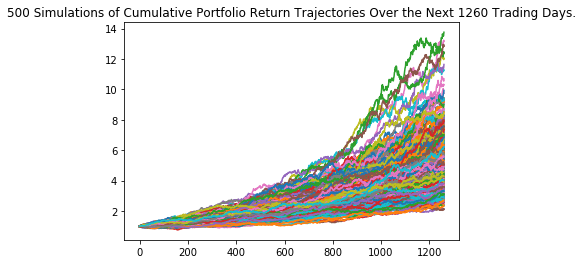

In [20]:
# Plot simulation outcomes
stock_fiveyr_line_plot = MC_stock_five_year.plot_simulation()

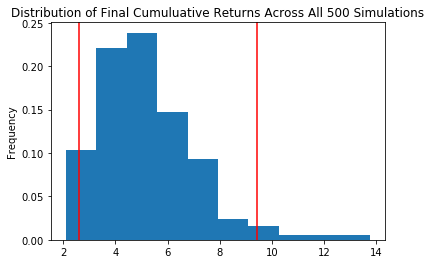

In [21]:
# Plot probability distribution and confidence intervals
Stock_fiveyr_dist_plot = MC_stock_five_year.plot_distribution()

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
stock_fiveyr_tbl = MC_stock_five_year.summarize_cumulative_return()

# Print summary statistics
print(stock_fiveyr_tbl)

count           500.000000
mean              5.188885
std               1.825146
min               2.104261
25%               3.843436
50%               4.903719
75%               6.208647
max              13.758551
95% CI Lower      2.623526
95% CI Upper      9.423554
Name: 1260, dtype: float64


In [23]:
# Crypto Data
crypto_close = yf.download(crypto, group_by='Ticker', period='10y')

# Create CSV of ticker data
crypto_close.to_csv('crypto.csv')

crypto_close = crypto_close.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

crypto_close = pd.read_csv('crypto.csv', header=[0, 1])
crypto_close.drop([0], axis=0, inplace=True)  # drop this row because it only has one column with Date in it
crypto_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')] = pd.to_datetime(crypto_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')], format='%Y-%m-%d')  # convert the first column to a datetime
crypto_close.set_index(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'), inplace=True)  # set the first column as the index
crypto_close.index.name = None

# Drop Null Information
crypto_close = crypto_close.dropna()

# Sort Multi-Index To Match Weights
crypto_close = crypto_close.reindex(sorted(crypto_close.columns), axis=1)

crypto_close

[*********************100%***********************]  5 of 5 completed


ADA-USD                                                        \
           Adj Close     Close      High       Low      Open        Volume   
2017-10-01  0.024969  0.024969  0.032226  0.017354  0.021678  5.006870e+07   
2017-10-02  0.025932  0.025932  0.030088  0.019969  0.024607  5.764130e+07   
2017-10-03  0.020816  0.020816  0.027425  0.020690  0.025757  1.699780e+07   
2017-10-04  0.021931  0.021931  0.022806  0.020864  0.020864  9.000050e+06   
2017-10-05  0.021489  0.021489  0.022154  0.020859  0.021951  5.562510e+06   
...              ...       ...       ...       ...       ...           ...   
2021-06-29  1.368437  1.368437  1.419944  1.320304  1.325513  2.589788e+09   
2021-06-30  1.383472  1.383472  1.398117  1.287063  1.372968  2.591116e+09   
2021-07-01  1.335611  1.335611  1.383814  1.304074  1.383814  2.002168e+09   
2021-07-02  1.394397  1.394397  1.394397  1.286607  1.332942  2.159410e+09   
2021-07-03  1.426307  1.426307  1.436377  1.360868  1.392511  2.062934e+09   

                 BTC-USD                                            ...  \
               Adj Close         Close          High           Low  ...   
2017-10-01   4403.740234   4403.740234   4403.740234   4269.810059  ...   
2017-10-02   4409.319824   4409.319824   4470.229980   4377.459961  ...   
2017-10-03   4317.479980   4317.479980   4432.470215   4258.890137  ...   
2017-10-04   4229.359863   4229.359863   4352.310059   4210.419922  ...   
2017-10-05   4328.410156   4328.410156   4362.640137   4164.049805  ...   
...                  ...           ...           ...           ...  ...   
2021-06-29  35867.777344  35867.777344  36542.109375  34252.484375  ...   
2021-06-30  35040.835938  35040.835938  36074.757812  34086.152344  ...   
2021-07-01  33572.117188  33572.117188  35035.984375  32883.781250  ...   
2021-07-02  33897.046875  33897.046875  33939.589844  32770.679688  ...   
2021-07-03  34799.269531  34799.269531  34867.812500  33415.519531  ...   

             LINK-USD                                        LTC-USD  \
                 High        Low       Open       Volume   Adj Close   
2017-10-01   0.451884   0.382034   0.451547   10005100.0   54.543301   
2017-10-02   0.440264   0.356767   0.437667    7101340.0   53.375999   
2017-10-03   0.367254   0.295817   0.367254    8211990.0   52.349602   
2017-10-04   0.398695   0.336883   0.343186    7604930.0   51.399502   
2017-10-05   0.417906   0.378043   0.397030    6291110.0   51.669498   
...               ...        ...        ...          ...         ...   
2021-06-29  20.533749  18.764088  18.811012  957886998.0  143.702911   
2021-06-30  19.762562  18.179699  19.523729  941628359.0  144.135834   
2021-07-01  19.498968  17.644156  19.498968  779093195.0  137.577530   
2021-07-02  18.520256  17.305502  18.220669  686541946.0  136.943695   
2021-07-03  18.869291  17.902514  18.331989  524233536.0  140.950836   

                                                                          
                 Close        High         Low        Open        Volume  
2017-10-01   54.543301   55.161598   53.625198   55.136200  1.001830e+08  
2017-10-02   53.375999   54.784801   53.257999   54.546902  9.547460e+07  
2017-10-03   52.349602   53.592999   51.586601   53.390400  8.851610e+07  
2017-10-04   51.399502   53.046101   50.830399   52.284302  7.747340e+07  
2017-10-05   51.669498   51.865501   50.440498   51.401402  6.959440e+07  
...                ...         ...         ...         ...           ...  
2021-06-29  143.702911  149.096283  137.423492  137.613098  2.182137e+09  
2021-06-30  144.135834  146.671570  136.429321  144.050446  1.889870e+09  
2021-07-01  137.577530  144.136642  134.406021  144.136642  1.681325e+09  
2021-07-02  136.943695  138.787704  130.935471  137.299271  1.418981e+09  
2021-07-03  140.950836  141.231918  134.979904  137.194077  1.197833e+09  

[1368 rows x 30 columns]

In [24]:
# Configuring a Monte Carlo simulation to forecast 1 year cumulative returns
MC_crypto_one_year = MCSimulation(
    portfolio_data = crypto_close,
    weights = cryptoweight,
    num_simulation = 500,
    num_trading_days = 252 * 1
)

In [25]:
# Printing the simulation input data
MC_crypto_one_year.portfolio_data.head()

ADA-USD                                                      \
           Adj Close     Close      High       Low      Open      Volume   
2017-10-01  0.024969  0.024969  0.032226  0.017354  0.021678  50068700.0   
2017-10-02  0.025932  0.025932  0.030088  0.019969  0.024607  57641300.0   
2017-10-03  0.020816  0.020816  0.027425  0.020690  0.025757  16997800.0   
2017-10-04  0.021931  0.021931  0.022806  0.020864  0.020864   9000050.0   
2017-10-05  0.021489  0.021489  0.022154  0.020859  0.021951   5562510.0   

                             BTC-USD                            ...  LINK-USD  \
           daily_return    Adj Close        Close         High  ...      Open   
2017-10-01          NaN  4403.740234  4403.740234  4403.740234  ...  0.451547   
2017-10-02     0.038568  4409.319824  4409.319824  4470.229980  ...  0.437667   
2017-10-03    -0.197285  4317.479980  4317.479980  4432.470215  ...  0.367254   
2017-10-04     0.053565  4229.359863  4229.359863  4352.310059  ...  0.343186   
2017-10-05    -0.020154  4328.410156  4328.410156  4362.640137  ...  0.397030   

                                       LTC-USD                        \
                Volume daily_return  Adj Close      Close       High   
2017-10-01  10005100.0          NaN  54.543301  54.543301  55.161598   
2017-10-02   7101340.0    -0.182940  53.375999  53.375999  54.784801   
2017-10-03   8211990.0    -0.031483  52.349602  52.349602  53.592999   
2017-10-04   7604930.0     0.149988  51.399502  51.399502  53.046101   
2017-10-05   6291110.0     0.023095  51.669498  51.669498  51.865501   

                                                            
                  Low       Open       Volume daily_return  
2017-10-01  53.625198  55.136200  100183000.0          NaN  
2017-10-02  53.257999  54.546902   95474600.0    -0.021401  
2017-10-03  51.586601  53.390400   88516096.0    -0.019230  
2017-10-04  50.830399  52.284302   77473400.0    -0.018149  
2017-10-05  50.440498  51.401402   69594400.0     0.005253  

[5 rows x 35 columns]

In [26]:
# Running a Monte Carlo simulation to forecast 1 year cumulative returns
MC_crypto_one_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.002676  1.039635  0.986906  1.049303  1.026516  1.025823  1.048362   
2    1.004281  1.046634  1.005295  1.066508  1.053730  1.030774  1.005793   
3    0.998945  1.019918  1.025321  1.049153  1.036399  1.049861  0.977236   
4    0.974320  1.076612  1.056186  1.048496  1.057463  1.049156  0.984178   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.973219  6.461320  0.832020  1.899580  2.620623  1.953209  0.635606   
249  1.957492  6.619551  0.819516  1.885216  2.576192  1.985654  0.606542   
250  1.931472  6.597864  0.799519  1.865587  2.527593  2.009735  0.610172   
251  1.939502  6.547133  0.793270  1.883184  2.491815  1.857437  0.593403   
252  1.932610  6.534286  0.777206  1.786862  2.497020  1.901651  0.597007   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    1.021154  1.038051  1.016193  ...  1.031648  1.003188  1.001172   
2    1.048681  1.063655  1.012014  ...  1.043028  1.025398  1.022141   
3    1.105906  1.053401  1.021903  ...  1.044639  1.032485  1.031553   
4    1.073246  1.034510  1.028336  ...  1.034352  1.047940  1.010187   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.992006  2.915225  5.092764  ...  1.121573  1.722160  4.021935   
249  1.969809  2.875917  5.289168  ...  1.100161  1.658119  3.927263   
250  2.043180  2.862127  5.386401  ...  1.075677  1.741341  3.974973   
251  2.086269  2.977941  5.238618  ...  1.142040  1.703018  4.021649   
252  2.058863  2.992941  5.284392  ...  1.156648  1.724203  3.938742   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.016054  1.024980  0.961963  0.947187  0.987570  1.066166  0.975336  
2    1.049050  1.004788  0.978515  0.976524  0.985624  1.050611  1.003107  
3    1.070712  1.015761  0.970096  0.959095  0.986092  1.059381  1.029042  
4    1.078874  0.980673  0.993646  0.958854  0.988149  1.089520  1.019495  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.568108  2.912732  2.184769  3.262422  2.986335  4.215722  3.885042  
249  1.546646  2.803979  2.221590  3.286191  3.121964  4.273575  4.054101  
250  1.538672  2.871722  2.182699  3.315372  3.124704  4.290432  3.864808  
251  1.545789  2.856345  2.155470  3.331732  3.134489  4.265951  3.881564  
252  1.566233  2.782105  2.096045  3.320109  3.120561  4.203657  3.822287  

[253 rows x 500 columns]

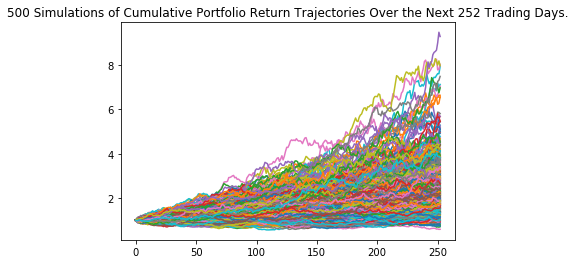

In [27]:
# Plot simulation outcomes
crypto_oneyr_line_plot = MC_crypto_one_year.plot_simulation()

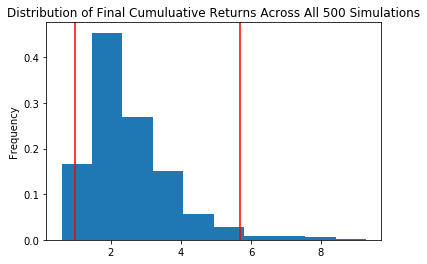

In [28]:
# Plot probability distribution and confidence intervals
crypto_oneyr_dist_plot = MC_crypto_one_year.plot_distribution()

In [29]:
# Fetch summary statistics from the Monte Carlo simulation results
crypto_oneyr_tbl = MC_crypto_one_year.summarize_cumulative_return()

# Print summary statistics
print(crypto_oneyr_tbl)

count           500.000000
mean              2.551145
std               1.250181
min               0.597007
25%               1.700396
50%               2.254338
75%               3.106503
max               9.280687
95% CI Lower      0.991201
95% CI Upper      5.676273
Name: 252, dtype: float64


In [30]:
# Configuring a Monte Carlo simulation to forecast 5 year cumulative returns
MC_crypto_five_year = MCSimulation(
    portfolio_data = crypto_close,
    weights = cryptoweight,
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [31]:
# Printing the simulation input data
MC_crypto_five_year.portfolio_data.head()

ADA-USD                                                      \
           Adj Close     Close      High       Low      Open      Volume   
2017-10-01  0.024969  0.024969  0.032226  0.017354  0.021678  50068700.0   
2017-10-02  0.025932  0.025932  0.030088  0.019969  0.024607  57641300.0   
2017-10-03  0.020816  0.020816  0.027425  0.020690  0.025757  16997800.0   
2017-10-04  0.021931  0.021931  0.022806  0.020864  0.020864   9000050.0   
2017-10-05  0.021489  0.021489  0.022154  0.020859  0.021951   5562510.0   

                             BTC-USD                            ...  LINK-USD  \
           daily_return    Adj Close        Close         High  ...      Open   
2017-10-01          NaN  4403.740234  4403.740234  4403.740234  ...  0.451547   
2017-10-02     0.038568  4409.319824  4409.319824  4470.229980  ...  0.437667   
2017-10-03    -0.197285  4317.479980  4317.479980  4432.470215  ...  0.367254   
2017-10-04     0.053565  4229.359863  4229.359863  4352.310059  ...  0.343186   
2017-10-05    -0.020154  4328.410156  4328.410156  4362.640137  ...  0.397030   

                                       LTC-USD                        \
                Volume daily_return  Adj Close      Close       High   
2017-10-01  10005100.0          NaN  54.543301  54.543301  55.161598   
2017-10-02   7101340.0    -0.182940  53.375999  53.375999  54.784801   
2017-10-03   8211990.0    -0.031483  52.349602  52.349602  53.592999   
2017-10-04   7604930.0     0.149988  51.399502  51.399502  53.046101   
2017-10-05   6291110.0     0.023095  51.669498  51.669498  51.865501   

                                                            
                  Low       Open       Volume daily_return  
2017-10-01  53.625198  55.136200  100183000.0          NaN  
2017-10-02  53.257999  54.546902   95474600.0    -0.021401  
2017-10-03  51.586601  53.390400   88516096.0    -0.019230  
2017-10-04  50.830399  52.284302   77473400.0    -0.018149  
2017-10-05  50.440498  51.401402   69594400.0     0.005253  

[5 rows x 35 columns]

In [32]:
# Running a Monte Carlo simulation to forecast 5 year cumulative returns
MC_crypto_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0           1          2           3          4          5    \
0      1.000000    1.000000   1.000000    1.000000   1.000000   1.000000   
1      1.046964    1.014920   0.957940    1.064239   0.997036   1.072262   
2      1.082860    0.986669   0.929282    1.105297   1.018921   1.105860   
3      1.075090    0.998330   0.923209    1.140022   1.046272   1.115919   
4      1.078755    1.021250   0.942259    1.170733   1.063712   1.156493   
...         ...         ...        ...         ...        ...        ...   
1256  51.495365  140.844344  77.176080  267.010431  71.638264  42.646188   
1257  50.793653  143.187498  70.374702  254.066213  72.473154  42.250207   
1258  51.184424  146.687428  72.954149  255.031211  71.899109  42.113083   
1259  50.567970  145.937505  74.353123  253.973412  70.593144  42.115704   
1260  50.633904  147.607598  74.094872  263.407414  70.804480  43.017607   

            6          7           8          9    ...        490        491  \
0      1.000000   1.000000    1.000000   1.000000  ...   1.000000   1.000000   
1      1.006002   0.961008    0.970454   1.007228  ...   1.023015   0.982815   
2      0.983081   0.954704    0.977075   1.001733  ...   1.052397   1.020394   
3      0.970684   0.922803    0.983120   1.014193  ...   1.008066   1.009694   
4      0.974930   0.930007    0.966071   0.990865  ...   1.017538   1.045963   
...         ...        ...         ...        ...  ...        ...        ...   
1256  48.611450  37.908551  296.000504  89.105394  ...  21.921014  69.898034   
1257  46.279035  38.946140  285.169193  90.333541  ...  21.768548  74.711145   
1258  48.002094  39.280770  269.149437  92.856597  ...  21.233948  76.770018   
1259  46.241901  38.683277  269.412604  92.262086  ...  21.587487  78.097446   
1260  45.021531  38.104533  264.382557  93.777794  ...  21.832509  74.263819   

            492       493         494         495        496       497  \
0      1.000000  1.000000    1.000000    1.000000   1.000000  1.000000   
1      0.982827  0.978478    1.025597    1.004645   1.022953  0.995488   
2      0.947114  0.998061    0.998936    1.009121   1.051113  1.006709   
3      0.988039  1.001791    1.005635    0.974304   1.070581  1.018347   
4      0.980351  1.069524    1.038619    0.966171   1.025372  0.999664   
...         ...       ...         ...         ...        ...       ...   
1256  97.954799  6.381760  112.445669  520.214836  39.852586  8.857934   
1257  96.770954  6.164259  108.828539  514.119895  40.401578  8.747620   
1258  93.690029  5.811104  114.466028  524.848092  40.158459  8.793365   
1259  92.889773  5.924505  112.070776  522.676745  41.926000  8.888219   
1260  96.311470  6.141919  110.885463  530.818734  41.643283  8.492817   

            498         499  
0      1.000000    1.000000  
1      1.012287    1.045307  
2      0.986707    1.100056  
3      0.997345    1.106711  
4      1.002744    1.117097  
...         ...         ...  
1256  43.143031  172.065385  
1257  44.026305  177.384532  
1258  44.303619  175.498436  
1259  46.307273  171.662057  
1260  43.898596  172.379741  

[1261 rows x 500 columns]

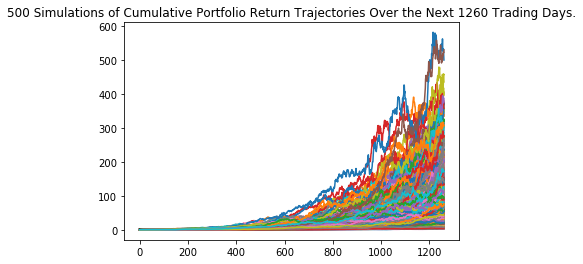

In [33]:
# Plot simulation outcomes
crypto_fiveyr_line_plot = MC_crypto_five_year.plot_simulation()

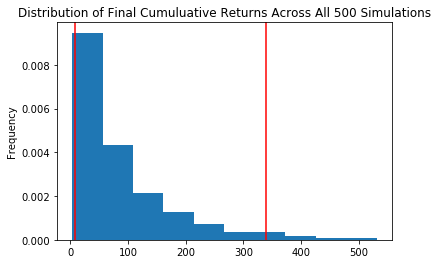

In [34]:
# Plot probability distribution and confidence intervals
crypto_fiveyr_dist_plot = MC_crypto_five_year.plot_distribution()

In [35]:
# Fetch summary statistics from the Monte Carlo simulation results
crypto_fiveyr_tbl = MC_crypto_five_year.summarize_cumulative_return()

# Print summary statistics
print(crypto_fiveyr_tbl)

count           500.000000
mean             89.537403
std              87.043513
min               2.980903
25%              32.618918
50%              55.920047
75%             115.227769
max             530.818734
95% CI Lower      7.322056
95% CI Upper    338.373329
Name: 1260, dtype: float64


In [36]:
# S&P 500 and AGG Data for comparison to the traditional 60/40 stocks and bonds portfolio
spbondStrings = ['AGG', 'SPY']

spagg_close = yf.download(spbondStrings, group_by='Ticker', period='10y')

# Create CSV of ticker data
spagg_close.to_csv('spagg.csv')

spagg_close = spagg_close.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

spagg_close = pd.read_csv('spagg.csv', header=[0, 1])
spagg_close.drop([0], axis=0, inplace=True)  # drop this row because it only has one column with Date in it
spagg_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')] = pd.to_datetime(spagg_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')], format='%Y-%m-%d')  # convert the first column to a datetime
spagg_close.set_index(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'), inplace=True)  # set the first column as the index
spagg_close.index.name = None

# Drop Null Information
spagg_close = spagg_close.dropna()

# Sort Multi-Index To Match Weights
spagg_close = spagg_close.reindex(sorted(spagg_close.columns), axis=1)

spagg_close

[*********************100%***********************]  2 of 2 completed


AGG                                                  \
             Adj Close       Close        High         Low        Open   
2011-07-05   83.183235  106.809998  106.820000  106.570000  106.570000   
2011-07-06   83.229973  106.870003  106.930000  106.760002  106.790001   
2011-07-07   82.996346  106.570000  106.669998  106.449997  106.629997   
2011-07-08   83.424675  107.120003  107.199997  106.930000  106.980003   
2011-07-11   83.650497  107.410004  107.540001  107.250000  107.339996   
...                ...         ...         ...         ...         ...   
2021-06-28  115.034187  115.190002  115.230003  115.040001  115.040001   
2021-06-29  115.094109  115.250000  115.250000  115.050003  115.059998   
2021-06-30  115.173996  115.330002  115.449997  115.300003  115.360001   
2021-07-01  115.110001  115.110001  115.190002  115.010002  115.150002   
2021-07-02  115.360001  115.360001  115.370003  115.169998  115.230003   

                              SPY                                      \
               Volume   Adj Close       Close        High         Low   
2011-07-05   799200.0  109.960556  133.809998  134.080002  133.389999   
2011-07-06   774600.0  110.091988  133.970001  134.139999  133.110001   
2011-07-07  1291600.0  111.234261  135.360001  135.699997  134.880005   
2011-07-08   682800.0  110.445328  134.399994  135.360001  133.389999   
2011-07-11   615000.0  108.448463  131.970001  133.179993  131.660004   
...               ...         ...         ...         ...         ...   
2021-06-28  5739000.0  427.470001  427.470001  427.649994  425.890015   
2021-06-29  5097100.0  427.700012  427.700012  428.559998  427.130005   
2021-06-30  6653100.0  428.059998  428.059998  428.779999  427.179993   
2021-07-01  4744900.0  430.429993  430.429993  430.600006  428.799988   
2021-07-02  4312800.0  433.720001  433.720001  434.100006  430.519989   

                                     
                  Open       Volume  
2011-07-05  133.779999  165936000.0  
2011-07-06  133.490005  143331600.0  
2011-07-07  135.160004  170464200.0  
2011-07-08  133.830002  194100500.0  
2011-07-11  132.750000  195918600.0  
...                ...          ...  
2021-06-28  427.170013   53159600.0  
2021-06-29  427.880005   35970500.0  
2021-06-30  427.209991   64827900.0  
2021-07-01  428.869995   53441000.0  
2021-07-02  431.670013   57679000.0  

[2517 rows x 12 columns]

In [37]:
# Configuring a Monte Carlo simulation to forecast 1 year cumulative returns
MC_spagg_one_year = MCSimulation(
    portfolio_data = spagg_close,
    weights = [0.40, 0.60],
    num_simulation = 500,
    num_trading_days = 252 * 1
)

In [38]:
# Printing the simulation input data
MC_spagg_one_year.portfolio_data.head()

AGG                                                  \
            Adj Close       Close        High         Low        Open   
2011-07-05  83.183235  106.809998  106.820000  106.570000  106.570000   
2011-07-06  83.229973  106.870003  106.930000  106.760002  106.790001   
2011-07-07  82.996346  106.570000  106.669998  106.449997  106.629997   
2011-07-08  83.424675  107.120003  107.199997  106.930000  106.980003   
2011-07-11  83.650497  107.410004  107.540001  107.250000  107.339996   

                                           SPY                          \
               Volume daily_return   Adj Close       Close        High   
2011-07-05   799200.0          NaN  109.960556  133.809998  134.080002   
2011-07-06   774600.0     0.000562  110.091988  133.970001  134.139999   
2011-07-07  1291600.0    -0.002807  111.234261  135.360001  135.699997   
2011-07-08   682800.0     0.005161  110.445328  134.399994  135.360001   
2011-07-11   615000.0     0.002707  108.448463  131.970001  133.179993   

                                                              
                   Low        Open       Volume daily_return  
2011-07-05  133.389999  133.779999  165936000.0          NaN  
2011-07-06  133.110001  133.490005  143331600.0     0.001196  
2011-07-07  134.880005  135.160004  170464200.0     0.010375  
2011-07-08  133.389999  133.830002  194100500.0    -0.007092  
2011-07-11  131.660004  132.750000  195918600.0    -0.018080

In [39]:
# Running a Monte Carlo simulation to forecast 1 year cumulative returns
MC_spagg_one_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.009299  1.006119  1.004542  1.000360  0.994279  0.998380  0.995961   
2    1.006134  1.002717  0.995049  1.010030  1.002243  0.993884  0.987323   
3    1.013071  1.009946  0.990786  1.001040  1.014635  1.003533  0.987864   
4    1.018328  1.017139  0.986974  1.008485  1.006657  1.003269  0.986686   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.060941  1.297632  1.232710  1.058318  1.161282  1.070288  1.123145   
249  1.061071  1.298108  1.215856  1.061586  1.171651  1.078580  1.111159   
250  1.059391  1.301270  1.224510  1.066324  1.155379  1.081058  1.100435   
251  1.066466  1.303325  1.220183  1.065649  1.164264  1.079078  1.107009   
252  1.074270  1.328271  1.219265  1.060357  1.180364  1.076927  1.115197   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.999170  1.001732  0.993862  ...  1.001149  1.003328  0.999116   
2    1.001610  1.008107  1.003165  ...  1.007595  1.015210  0.999000   
3    0.993994  1.008347  1.003247  ...  0.995885  1.008233  1.006207   
4    0.996385  1.008275  1.011574  ...  0.997029  1.012835  1.008708   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.239756  1.146289  1.112068  ...  1.181872  1.121735  1.062340   
249  1.224213  1.142225  1.117764  ...  1.169796  1.112245  1.053949   
250  1.217625  1.129649  1.116848  ...  1.178329  1.130307  1.044477   
251  1.217099  1.127673  1.128555  ...  1.183701  1.124662  1.048331   
252  1.216398  1.133194  1.139734  ...  1.182789  1.124356  1.052306   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    1.005185  1.002764  1.003040  0.998914  0.998131  1.001543  1.001854  
2    1.008624  1.001272  0.999506  0.989048  0.999215  1.002512  0.995195  
3    1.008658  0.996309  1.013676  0.987238  1.000835  1.002186  0.988978  
4    1.003902  0.996820  0.999656  0.987132  0.988962  0.994877  0.995026  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.159367  1.091408  1.082991  0.882748  0.906003  1.102162  1.155642  
249  1.155198  1.102805  1.078766  0.888658  0.901589  1.098302  1.160188  
250  1.150654  1.105463  1.071847  0.898040  0.912564  1.096691  1.162470  
251  1.140332  1.106195  1.064425  0.908109  0.924122  1.105500  1.172929  
252  1.128233  1.106808  1.070713  0.912095  0.904152  1.098098  1.164909  

[253 rows x 500 columns]

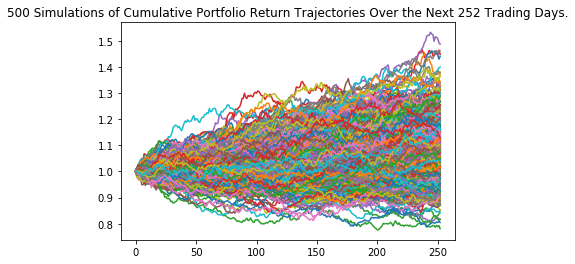

In [40]:
# Plot simulation outcomes
spagg_oneyr_line_plot = MC_spagg_one_year.plot_simulation()

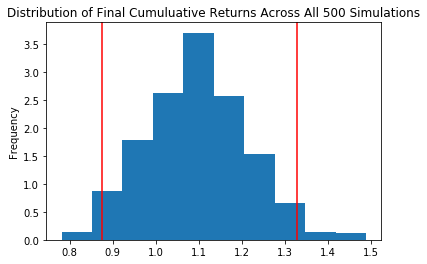

In [41]:
# Plot probability distribution and confidence intervals
spagg_oneyr_dist_plot = MC_spagg_one_year.plot_distribution()

In [42]:
# Fetch summary statistics from the Monte Carlo simulation results
spagg_oneyr_tbl = MC_spagg_one_year.summarize_cumulative_return()

# Print summary statistics
print(spagg_oneyr_tbl)

count           500.000000
mean              1.095829
std               0.118867
min               0.780959
25%               1.015464
50%               1.094348
75%               1.174961
max               1.487654
95% CI Lower      0.874930
95% CI Upper      1.328134
Name: 252, dtype: float64


In [43]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_spagg_five_year = MCSimulation(
    portfolio_data = spagg_close,
    weights = [0.40, 0.60],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [44]:
# Printing the simulation input data
MC_spagg_five_year.portfolio_data.head()

AGG                                                  \
            Adj Close       Close        High         Low        Open   
2011-07-05  83.183235  106.809998  106.820000  106.570000  106.570000   
2011-07-06  83.229973  106.870003  106.930000  106.760002  106.790001   
2011-07-07  82.996346  106.570000  106.669998  106.449997  106.629997   
2011-07-08  83.424675  107.120003  107.199997  106.930000  106.980003   
2011-07-11  83.650497  107.410004  107.540001  107.250000  107.339996   

                                           SPY                          \
               Volume daily_return   Adj Close       Close        High   
2011-07-05   799200.0          NaN  109.960556  133.809998  134.080002   
2011-07-06   774600.0     0.000562  110.091988  133.970001  134.139999   
2011-07-07  1291600.0    -0.002807  111.234261  135.360001  135.699997   
2011-07-08   682800.0     0.005161  110.445328  134.399994  135.360001   
2011-07-11   615000.0     0.002707  108.448463  131.970001  133.179993   

                                                              
                   Low        Open       Volume daily_return  
2011-07-05  133.389999  133.779999  165936000.0          NaN  
2011-07-06  133.110001  133.490005  143331600.0     0.001196  
2011-07-07  134.880005  135.160004  170464200.0     0.010375  
2011-07-08  133.389999  133.830002  194100500.0    -0.007092  
2011-07-11  131.660004  132.750000  195918600.0    -0.018080

In [45]:
# Running a Monte Carlo simulation to forecast 5 year cumulative returns
MC_spagg_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.991391  0.989734  1.006034  1.003857  0.994924  0.998754  1.012059   
2     0.993934  0.989576  1.003940  0.990056  0.990518  0.992190  1.008904   
3     0.999367  0.981124  1.012644  0.986041  0.999494  0.992906  1.016326   
4     1.002772  0.974039  1.011700  0.995645  1.006085  0.997034  1.014621   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.125334  1.265006  1.373376  1.354341  1.401134  1.240798  2.190079   
1257  1.128147  1.288839  1.367278  1.360757  1.388935  1.225613  2.199846   
1258  1.115095  1.291214  1.361899  1.345293  1.389923  1.220281  2.197335   
1259  1.107494  1.302343  1.347268  1.339013  1.379881  1.213547  2.199590   
1260  1.108853  1.290662  1.353653  1.341006  1.379893  1.211496  2.191783   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.998182  1.007288  0.988696  ...  0.994868  1.002613  1.006776   
2     0.988366  1.023344  0.984512  ...  0.998142  1.017587  1.007663   
3     0.997645  1.027703  0.996367  ...  0.984007  1.013343  1.013359   
4     0.992499  1.018954  0.992743  ...  0.974132  1.033068  1.010202   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.293544  1.974202  1.822756  ...  1.105740  1.185336  1.782149   
1257  1.292716  1.967780  1.817883  ...  1.103106  1.193624  1.770942   
1258  1.285039  1.972479  1.816563  ...  1.103956  1.194987  1.776172   
1259  1.282522  1.943410  1.811757  ...  1.110550  1.192839  1.789070   
1260  1.273177  1.945077  1.837418  ...  1.098755  1.190013  1.784017   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.006363  1.010689  0.999548  1.011717  0.998680  0.998876  0.993018  
2     1.008821  1.015740  1.005053  1.015555  1.011310  1.003468  1.000720  
3     1.004442  1.012002  1.008255  1.014826  1.010185  1.001498  1.002767  
4     1.005214  1.005706  1.000857  1.011419  1.010846  0.992312  0.999763  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.297530  1.173663  2.115483  1.398262  2.009916  1.265569  1.454049  
1257  1.305114  1.170557  2.135873  1.383811  2.018637  1.254984  1.463578  
1258  1.324468  1.165435  2.124376  1.386718  2.006580  1.248368  1.453340  
1259  1.324036  1.163565  2.125642  1.377812  2.021767  1.264218  1.448474  
1260  1.329823  1.162127  2.107482  1.380672  2.042616  1.271870  1.450131  

[1261 rows x 500 columns]

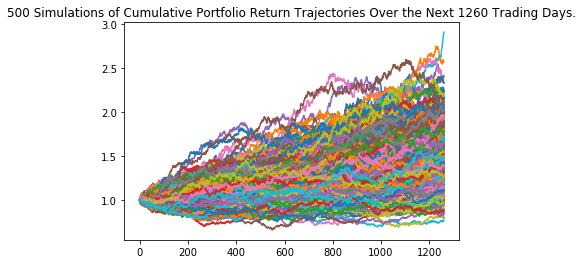

In [46]:
# Plot simulation outcomes
spagg_fiveyr_line_plot = MC_spagg_five_year.plot_simulation()

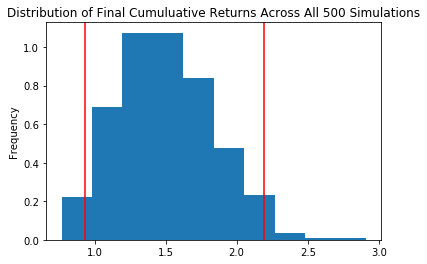

In [47]:
# Plot probability distribution and confidence intervals
spagg_fiveyr_dist_plot = MC_spagg_five_year.plot_distribution()

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
spagg_fiveyr_tbl = MC_spagg_five_year.summarize_cumulative_return()

# Print summary statistics
print(spagg_fiveyr_tbl)

count           500.000000
mean              1.500671
std               0.334123
min               0.768199
25%               1.262495
50%               1.468940
75%               1.713884
max               2.909059
95% CI Lower      0.930021
95% CI Upper      2.190702
Name: 1260, dtype: float64


In [49]:
# QQQ and SPY Data for comparisons to either the Nasdaq or S&P 500 indexes
qqqStrings = ['QQQ', 'SPY']

qqq_close = yf.download(qqqStrings, group_by='Ticker', period='10y')

# Create CSV of ticker data
qqq_close.to_csv('qqq.csv')

qqq_close = qqq_close.stack(level=0).rename_axis(['Date', 'Ticker']).reset_index(level=1)

qqq_close = pd.read_csv('qqq.csv', header=[0, 1])
qqq_close.drop([0], axis=0, inplace=True)  # drop this row because it only has one column with Date in it
qqq_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')] = pd.to_datetime(qqq_close[('Unnamed: 0_level_0', 'Unnamed: 0_level_1')], format='%Y-%m-%d')  # convert the first column to a datetime
qqq_close.set_index(('Unnamed: 0_level_0', 'Unnamed: 0_level_1'), inplace=True)  # set the first column as the index
qqq_close.index.name = None

# Drop Null Information
qqq_close = qqq_close.dropna()

# Sort Multi-Index To Match Weights
qqq_close = qqq_close.reindex(sorted(qqq_close.columns), axis=1)

qqq_close

[*********************100%***********************]  2 of 2 completed


QQQ                                                  \
             Adj Close       Close        High         Low        Open   
2011-07-05   52.669102   58.200001   58.259998   57.830002   57.970001   
2011-07-06   52.841038   58.389999   58.490002   57.939999   58.130001   
2011-07-07   53.565018   59.189999   59.360001   58.740002   58.830002   
2011-07-08   53.420204   59.029999   59.040001   58.369999   58.680000   
2011-07-11   52.451885   57.959999   58.709999   57.759998   58.410000   
...                ...         ...         ...         ...         ...   
2021-06-28  353.709991  353.709991  353.850006  350.720001  350.779999   
2021-06-29  354.989990  354.989990  355.019989  352.670013  353.529999   
2021-06-30  354.429993  354.429993  355.230011  353.829987  354.829987   
2021-07-01  354.570007  354.570007  355.089996  352.679993  354.070007   
2021-07-02  358.640015  358.640015  358.970001  356.279999  356.519989   

                               SPY                                      \
                Volume   Adj Close       Close        High         Low   
2011-07-05  43128800.0  109.960556  133.809998  134.080002  133.389999   
2011-07-06  49282700.0  110.091988  133.970001  134.139999  133.110001   
2011-07-07  54799800.0  111.234261  135.360001  135.699997  134.880005   
2011-07-08  69519500.0  110.445328  134.399994  135.360001  133.389999   
2011-07-11  52080800.0  108.448463  131.970001  133.179993  131.660004   
...                ...         ...         ...         ...         ...   
2021-06-28  39130300.0  427.470001  427.470001  427.649994  425.890015   
2021-06-29  29426000.0  427.700012  427.700012  428.559998  427.130005   
2021-06-30  32724000.0  428.059998  428.059998  428.779999  427.179993   
2021-07-01  29290000.0  430.429993  430.429993  430.600006  428.799988   
2021-07-02  32715600.0  433.720001  433.720001  434.100006  430.519989   

                                     
                  Open       Volume  
2011-07-05  133.779999  165936000.0  
2011-07-06  133.490005  143331600.0  
2011-07-07  135.160004  170464200.0  
2011-07-08  133.830002  194100500.0  
2011-07-11  132.750000  195918600.0  
...                ...          ...  
2021-06-28  427.170013   53159600.0  
2021-06-29  427.880005   35970500.0  
2021-06-30  427.209991   64827900.0  
2021-07-01  428.869995   53441000.0  
2021-07-02  431.670013   57679000.0  

[2517 rows x 12 columns]

In [50]:
# Configuring a Monte Carlo simulation to forecast 1 year cumulative returns
MC_qqq_one_year = MCSimulation(
    portfolio_data = qqq_close,
    weights = [1, 0],
    num_simulation = 500,
    num_trading_days = 252 * 1
)

In [51]:
# Printing the simulation input data
MC_qqq_one_year.portfolio_data.head()

QQQ                                                          \
            Adj Close      Close       High        Low       Open      Volume   
2011-07-05  52.669102  58.200001  58.259998  57.830002  57.970001  43128800.0   
2011-07-06  52.841038  58.389999  58.490002  57.939999  58.130001  49282700.0   
2011-07-07  53.565018  59.189999  59.360001  58.740002  58.830002  54799800.0   
2011-07-08  53.420204  59.029999  59.040001  58.369999  58.680000  69519500.0   
2011-07-11  52.451885  57.959999  58.709999  57.759998  58.410000  52080800.0   

                                SPY                                      \
           daily_return   Adj Close       Close        High         Low   
2011-07-05          NaN  109.960556  133.809998  134.080002  133.389999   
2011-07-06     0.003265  110.091988  133.970001  134.139999  133.110001   
2011-07-07     0.013701  111.234261  135.360001  135.699997  134.880005   
2011-07-08    -0.002703  110.445328  134.399994  135.360001  133.389999   
2011-07-11    -0.018126  108.448463  131.970001  133.179993  131.660004   

                                                  
                  Open       Volume daily_return  
2011-07-05  133.779999  165936000.0          NaN  
2011-07-06  133.490005  143331600.0     0.001196  
2011-07-07  135.160004  170464200.0     0.010375  
2011-07-08  133.830002  194100500.0    -0.007092  
2011-07-11  132.750000  195918600.0    -0.018080

In [52]:
# Running a Monte Carlo simulation to forecast 1 year cumulative returns
MC_qqq_one_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1    1.004377  0.988080  1.003342  0.992886  1.016185  1.011153  1.022856   
2    0.985943  0.999821  1.016053  1.012709  1.019381  1.021383  1.032327   
3    0.977256  1.002814  1.005159  1.019486  1.013203  1.022450  1.032985   
4    0.984702  0.994050  1.011929  1.042830  1.009623  1.049397  1.044513   
..        ...       ...       ...       ...       ...       ...       ...   
248  1.351689  1.192721  1.219712  1.157358  1.624995  1.305646  1.256293   
249  1.332044  1.188050  1.219243  1.130500  1.622198  1.318256  1.241032   
250  1.303394  1.195335  1.220900  1.142401  1.610023  1.293380  1.241976   
251  1.305296  1.209778  1.192126  1.148974  1.565643  1.294073  1.235362   
252  1.310212  1.227571  1.183663  1.151485  1.571788  1.290150  1.248210   

          7         8         9    ...       490       491       492  \
0    1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1    0.982044  0.994591  1.019318  ...  0.994764  1.015463  0.990485   
2    0.989113  0.971062  1.012142  ...  0.979248  1.013209  0.998689   
3    1.010511  0.960352  1.014010  ...  0.978469  1.022567  1.015434   
4    1.008777  0.963219  1.017940  ...  0.974617  1.004054  1.008338   
..        ...       ...       ...  ...       ...       ...       ...   
248  1.364008  1.394970  1.309922  ...  1.083426  1.358331  0.964568   
249  1.380813  1.389792  1.302939  ...  1.070386  1.350139  0.980695   
250  1.373553  1.393473  1.301399  ...  1.060306  1.366633  0.977457   
251  1.354639  1.384218  1.312914  ...  1.067537  1.375493  0.975748   
252  1.367673  1.363599  1.327883  ...  1.047319  1.403109  0.979591   

          493       494       495       496       497       498       499  
0    1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1    0.999746  1.001826  0.995742  1.000544  1.027338  1.001239  0.996413  
2    0.997827  0.978939  0.994717  0.982024  1.032930  1.007877  0.999614  
3    0.991980  0.982817  0.982679  1.001152  1.030587  1.029249  0.974231  
4    1.012005  0.968674  0.981869  1.013850  1.027696  1.021741  0.972768  
..        ...       ...       ...       ...       ...       ...       ...  
248  1.155731  1.188206  1.128990  1.488599  0.954741  1.478178  1.179077  
249  1.151101  1.167583  1.141042  1.511038  0.958294  1.498225  1.173837  
250  1.169892  1.175292  1.129881  1.513530  0.938592  1.504636  1.174945  
251  1.158445  1.172572  1.141794  1.518573  0.943075  1.500919  1.154936  
252  1.171079  1.167413  1.130954  1.503114  0.985462  1.512133  1.186576  

[253 rows x 500 columns]

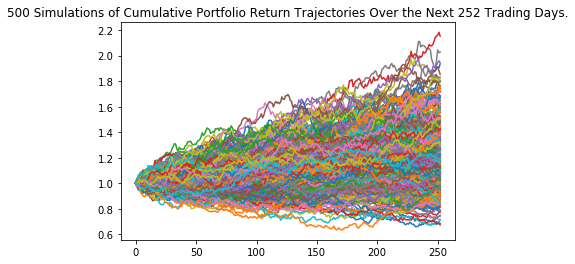

In [53]:
# Plot simulation outcomes
qqq_oneyr_line_plot = MC_qqq_one_year.plot_simulation()

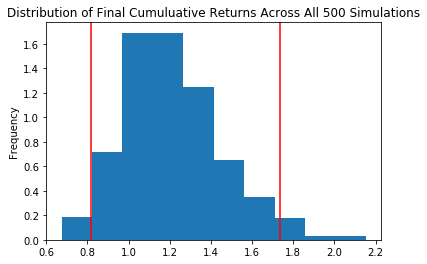

In [54]:
# Plot probability distribution and confidence intervals
qqq_oneyr_dist_plot = MC_qqq_one_year.plot_distribution()

In [55]:
# Fetch summary statistics from the Monte Carlo simulation results
qqq_oneyr_tbl = MC_qqq_one_year.summarize_cumulative_return()

# Print summary statistics
print(qqq_oneyr_tbl)

count           500.000000
mean              1.212460
std               0.234398
min               0.674407
25%               1.057636
50%               1.181854
75%               1.352625
max               2.153330
95% CI Lower      0.818180
95% CI Upper      1.734239
Name: 252, dtype: float64


In [56]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_qqq_five_year = MCSimulation(
    portfolio_data = qqq_close,
    weights = [1, 0],
    num_simulation = 500,
    num_trading_days = 252 * 5
)

In [57]:
# Printing the simulation input data
MC_qqq_five_year.portfolio_data.head()

QQQ                                                          \
            Adj Close      Close       High        Low       Open      Volume   
2011-07-05  52.669102  58.200001  58.259998  57.830002  57.970001  43128800.0   
2011-07-06  52.841038  58.389999  58.490002  57.939999  58.130001  49282700.0   
2011-07-07  53.565018  59.189999  59.360001  58.740002  58.830002  54799800.0   
2011-07-08  53.420204  59.029999  59.040001  58.369999  58.680000  69519500.0   
2011-07-11  52.451885  57.959999  58.709999  57.759998  58.410000  52080800.0   

                                SPY                                      \
           daily_return   Adj Close       Close        High         Low   
2011-07-05          NaN  109.960556  133.809998  134.080002  133.389999   
2011-07-06     0.003265  110.091988  133.970001  134.139999  133.110001   
2011-07-07     0.013701  111.234261  135.360001  135.699997  134.880005   
2011-07-08    -0.002703  110.445328  134.399994  135.360001  133.389999   
2011-07-11    -0.018126  108.448463  131.970001  133.179993  131.660004   

                                                  
                  Open       Volume daily_return  
2011-07-05  133.779999  165936000.0          NaN  
2011-07-06  133.490005  143331600.0     0.001196  
2011-07-07  135.160004  170464200.0     0.010375  
2011-07-08  133.830002  194100500.0    -0.007092  
2011-07-11  132.750000  195918600.0    -0.018080

In [58]:
# Running a Monte Carlo simulation to forecast 5 year cumulative returns
MC_qqq_five_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.984068  0.983752  0.984622  1.033892  0.979630  1.000006  1.012294   
2     1.000354  0.989826  0.968682  1.027336  0.964466  0.999713  1.006065   
3     0.994853  1.004725  0.982254  1.009039  0.983004  1.016278  1.009945   
4     0.985721  0.990394  0.969308  1.004666  1.001490  1.024587  0.994865   
...        ...       ...       ...       ...       ...       ...       ...   
1256  3.084913  3.249549  1.934850  2.060136  2.591800  2.421326  2.234722   
1257  3.036633  3.301005  1.907747  2.086323  2.524878  2.459913  2.216177   
1258  3.082980  3.274364  1.941470  2.124820  2.520875  2.422855  2.201250   
1259  3.108056  3.282533  1.911264  2.113628  2.496032  2.399016  2.216666   
1260  3.198542  3.295330  1.932068  2.104951  2.471683  2.392436  2.161843   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.002714  0.982528  0.998832  ...  0.978681  1.004278  0.999311   
2     1.012932  0.996648  1.013802  ...  0.974258  1.020344  0.993009   
3     1.020020  0.990498  1.023847  ...  0.949729  1.028169  0.985117   
4     1.011255  0.982116  1.032143  ...  0.958585  1.034984  0.983171   
...        ...       ...       ...  ...       ...       ...       ...   
1256  2.727513  3.156122  1.407585  ...  3.947975  1.581030  2.546898   
1257  2.739851  3.133632  1.426410  ...  3.918233  1.605709  2.510411   
1258  2.777073  3.158075  1.415465  ...  3.877516  1.585648  2.551385   
1259  2.711980  3.225147  1.420843  ...  3.825423  1.615855  2.634678   
1260  2.702071  3.255168  1.431038  ...  3.783269  1.622840  2.625521   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.006276  0.999965  0.978489  0.999591  1.001202  0.996008  0.974563  
2     1.013402  1.005601  0.967184  0.994043  0.991227  1.001356  0.958651  
3     0.998229  1.004932  0.949516  0.993770  0.978476  0.991408  0.944610  
4     0.995786  0.990930  0.939513  0.993343  0.972060  1.004927  0.955601  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.280571  1.822413  1.972895  2.415095  2.803522  1.311627  2.337147  
1257  1.268067  1.817893  1.976421  2.405511  2.735564  1.332549  2.301365  
1258  1.261694  1.849603  1.997373  2.355790  2.700249  1.326301  2.312398  
1259  1.252120  1.833352  2.003359  2.369113  2.754393  1.355936  2.349027  
1260  1.248093  1.829375  2.006737  2.350119  2.769338  1.376941  2.347940  

[1261 rows x 500 columns]

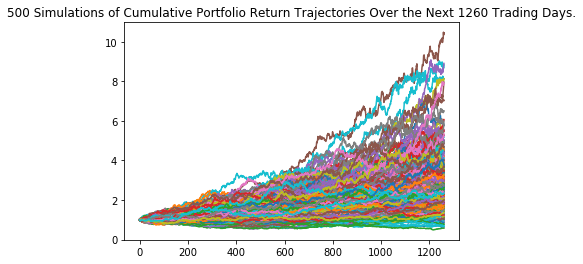

In [59]:
# Plot simulation outcomes
qqq_fiveyr_line_plot = MC_qqq_five_year.plot_simulation()

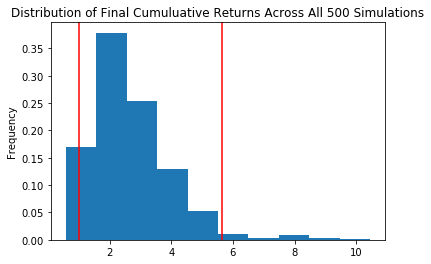

In [60]:
# Plot probability distribution and confidence intervals
qqq_fiveyr_dist_plot = MC_qqq_five_year.plot_distribution()

In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
qqq_fiveyr_tbl = MC_qqq_five_year.summarize_cumulative_return()

# Print summary statistics
print(qqq_fiveyr_tbl)

count           500.000000
mean              2.706285
std               1.315198
min               0.575779
25%               1.827441
50%               2.393939
75%               3.312471
max              10.454855
95% CI Lower      1.000608
95% CI Upper      5.661835
Name: 1260, dtype: float64


In [62]:
##Dashboard Setup
# Create a Title for the Dashboard
title = pn.pane.Markdown(
    """
# Investment Portfolio Analysis and Forecasting
""",
    width=800,
)

# Define a welcome text
welcome = pn.pane.Markdown(
    """
This dashboard presents a visual analysis of Monte Carlo Simulations for
your personal stock portfolio, crypto portfolio, an example of the traditional 60/40
stocks and bonds portfolio and either the QQQ or SPY benchmark index. You can navigate through the tabs above
to explore more details about the portfolio and it's simulated returns as well as calculations for expected returns.
""",
    width=1024,
)

# Create a tab layout for the dashboard
tabs = pn.Tabs(
    # First tab
    (
        "Welcome",
        pn.Column(
            welcome
        )
    ),
    # Second tab
    (
        "My Portfolio",
        pn.Column(
                pn.Row( , ),
                pn.Row( , ),
                pn.Row( , )
        )
    ),
    # Third tab
    (
        "Portfolio Monte Carlo Simulation and Forecasted Returns",
        pn.Column(
            create_line_chart(
                df_avg_costs["shelter_costs_owned"],
                "Average Monthly Shelter Cost for Owned Dwellings in Toronto",
                "Year",
                "Avg Monthly Shelter Costs",
                "blue"
            ),
            create_line_chart(
                df_avg_costs["shelter_costs_rented"],
                "Average Monthly Shelter Cost for Rented Dwellings in Toronto",
                "Year",
                "Avg Monthly Shelter Costs",
                "orange"
            ),
            average_house_value(),
        ),
    ),
    # Forth Tab
    (
        "Benchmark Monte Carlo Simulations and Forecasted Returns",
        pn.Row(
            pn.Column(
                average_value_by_neighbourhood(),
                number_dwelling_types(),
            ),
            pn.Column(
                average_house_value_snapshot(),
            )
        )
    )
)

# Create the main dashboard
dashboard = pn.Column(
    pn.Row(title),
    tabs,
    width=1024,
    height=768
)

SyntaxError: invalid syntax (<ipython-input-62-b96bffccf7c7>, line 34)

In [ ]:
dashboard.servable()